<a href="https://colab.research.google.com/github/arad1367/Instagram_NLP_project/blob/master/Instagram_Food_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Natural Language Processing with TensorFlow based on Instagram pages food review (A custom dataset)

- 1: Positive comments label
- 0: Negative comments label

### Check for GPU

In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 20.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: ten

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


### Get helper functions

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/arad1367/Instagram_NLP_project/master/helper_functions.py

--2024-01-16 15:41:23--  https://raw.githubusercontent.com/arad1367/Instagram_NLP_project/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-01-16 15:41:23 (50.6 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

### Download a text dataset

In [ ]:
### data from my Github
import pandas as pd

!wget "https://raw.githubusercontent.com/arad1367/Instagram_NLP_project/master/Data_food.csv"
data = pd.read_csv('Data_food.csv')
data.head()

--2024-01-16 15:53:41--  https://raw.githubusercontent.com/arad1367/Instagram_NLP_project/master/Data_food.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32834 (32K) [text/plain]
Saving to: ‘Data_food.csv’

Data_food.csv       100%[===================>]  32.06K  --.-KB/s    in 0s      

2024-01-16 15:53:41 (84.8 MB/s) - ‘Data_food.csv’ saved [32834/32834]



,Comments,Label
0,I have taken it twice. It was really tasty and...,1
1,Wow!,1
2,This dish is an instant appetite suppressant.,0
3,Very beautiful!,1
4,Trash literally!,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  1000 non-null   object
 1   Label     1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
# Split data to train and test datasets
bound = int(len(data) * 0.8)
train_df = data[:bound]
test_df = data[bound:]

In [ ]:
len(train_df), len(test_df), train_df.isna().sum(), test_df.isna().sum()

(800,
 200,
 Comments    0
 Label       0
 dtype: int64,
 Comments    0
 Label       0
 dtype: int64)

In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,Comments,Label
696,It's a small and interesting restaurant.,1
667,Don't eat us.,0
63,Wow. This is my heaven.,1
533,Who should I book for?,1
66,All of them was the same.,0


In [ ]:
# Check some labels
train_df_shuffled['Comments'][70]

"I'd rather lick a dirty shoe than take a bite of this."

In [ ]:
train_df_shuffled.head()

,Comments,Label
696,It's a small and interesting restaurant.,1
667,Don't eat us.,0
63,Wow. This is my heaven.,1
533,Who should I book for?,1
66,All of them was the same.,0


In [ ]:
# The test data doesn't have a target
test_df.head()
test_df = test_df.drop("Label", axis=1)
test_df.tail()

,Comments
995,"I'm sorry, but this just doesn't look appetizi..."
996,You're a culinary genius!
997,Your culinary skills are truly impressive!
998,"I'm sorry, but this dish doesn't seem very app..."
999,It's disappointing to see a lack of attention ...


In [ ]:
# How many examples of each class?
train_df.Label.value_counts(), len(train_df), train_df.dtypes

(1    574
 0    226
 Name: Label, dtype: int64,
 800,
 Comments    object
 Label        int64
 dtype: object)

In [ ]:
# How many total samples
len(train_df), len(test_df)

(800, 200)

In [ ]:
# Let's visualize some random training examples >>> Use random to prevent Bias
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["Comments", "Label"]][random_index:random_index+5].itertuples():
  _, comment, label = row
  print(f"Label: {label}", "(Positive comment)" if label > 0 else "(Negative comment)")
  print(f"Comment:\n{comment}\n")
  print("---\n")

Label: 1 (Positive comment)
Comment:
Wow, this is my favorite food

---

Label: 1 (Positive comment)
Comment:
This is just awesome.

---

Label: 1 (Positive comment)
Comment:
This is the one.

---

Label: 1 (Positive comment)
Comment:
We went there. It's so cool.

---

Label: 1 (Positive comment)
Comment:
It's a masterpiece.

---



### Split data into training and validation sets

In [ ]:
train_df_shuffled.head()

,Comments,Label
696,It's a small and interesting restaurant.,1
667,Don't eat us.,0
63,Wow. This is my heaven.,1
533,Who should I book for?,1
66,All of them was the same.,0


In [ ]:
from sklearn.model_selection import train_test_split

x = train_df_shuffled['Comments'].to_numpy()
y = train_df_shuffled['Label'].to_numpy()

# Use train_test_split to split training data into training and validation sets
train_statement, valid_statement, train_label, valid_label = train_test_split(x,
                                                                              y,
                                                                              test_size=0.1,
                                                                              random_state=42)

In [ ]:
len(train_statement), len(train_label), len(valid_statement), len(valid_label)

(720, 720, 80, 80)

In [ ]:
# View the first 10 training sentences and their labels
train_statement[:10], train_label[:10]

(array(['Twenty!', 'I tried it. It was great.',
        'Pizza should be its own food group.',
        'Stop posting such tasty dishes!', 'I really love this meal.',
        'This meal is an insult to taste buds everywhere.',
        'This place is so nice.', "I'd rather throw it away.",
        'I wish I had lunch with you.', 'What a delicious cancer!'],
       dtype=object),
 array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0]))

### Text vectorization (Tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
# Note: in TensorFlow 2.6+, you no longer need "layers.experimental.preprocessing"
# you can use: "tf.keras.layers.TextVectorization", see https://github.com/tensorflow/tensorflow/releases/tag/v2.6.0 for more

# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [ ]:
# Find average number of tokens (words) in training Tweets
import math
math.ceil(sum([len(i.split()) for i in train_statement])/len(train_statement))

6

In [ ]:
# Setup and recreate text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary >> 32179 is common value
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
train_statement[:3], type(train_statement)

(array(['Twenty!', 'I tried it. It was great.',
        'Pizza should be its own food group.'], dtype=object),
 numpy.ndarray)

To `map` our TextVectorization instance `text_vectorizer` to our data, we can call the `adapt() method` on it whilst passing it our training text.

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_statement)

In [ ]:
train_statement[10]

'I think the quality of the food has gone down and it is terrible.'

In [ ]:
text_vectorizer([train_statement[10]])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  4, 122,   3,  36,  17,   3,  15, 132, 295, 673,   9,   2,   6,
        103,   0]])>

In [ ]:
# Create sample sentence and tokenize it
# For example

sample_sentence = 'Iranian foods are amazing. just test them!'
text_vectorizer([sample_sentence]) # Text_vectorizer receive a list of sentences (A list of sequence)

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[580,   1,  20,  55,  60,   1,  73,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
import random

random_sentence = random.choice(train_statement)
print(f"""The original sentence is: {random_sentence}
      \nThe sentence after Vectorisation(Tokenisation) is: \n\n{text_vectorizer([random_sentence])}""")

The original sentence is: Wow! This is my favorite spot!
      
The sentence after Vectorisation(Tokenisation) is: 

[[ 23   5   6  19  77 253   0   0   0   0   0   0   0   0   0]]


Finally, we can check the unique tokens in our vocabulary using the `get_vocabulary()` method.

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 799
Top 5 most common words: ['', '[UNK]', 'it', 'the', 'i']
Bottom 5 least common words: ['action', 'according', 'abroad', 'abomination', '5']


### Creating an Embedding using an Embedding Layer

In [ ]:
from tensorflow.keras.layers import Embedding

max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15

embedding = Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1")

embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_statement)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
It was great. Thanks for the recipe.      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.03939937, -0.01785392,  0.0434343 , ..., -0.0063682 ,
          0.04708252,  0.02269223],
        [ 0.02366411,  0.02325776, -0.01102725, ..., -0.00075834,
         -0.03154635, -0.00586102],
        [ 0.01007491,  0.0095922 ,  0.00172765, ...,  0.02201894,
         -0.00334103, -0.04159261],
        ...,
        [ 0.00132421, -0.01757239,  0.01786659, ..., -0.03491539,
          0.01521829,  0.01604912],
        [ 0.00132421, -0.01757239,  0.01786659, ..., -0.03491539,
          0.01521829,  0.01604912],
        [ 0.00132421, -0.01757239,  0.01786659, ..., -0.03491539,
          0.01521829,  0.01604912]]], dtype=float32)>

In [ ]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.03939937, -0.01785392,  0.0434343 ,  0.03448189,  0.02893851,
       -0.00885004,  0.03181795, -0.04398861,  0.03335457, -0.01458664,
        0.04541344,  0.01870384, -0.03290115,  0.00511049, -0.02742136,
        0.0038404 , -0.00133444,  0.00440024, -0.04931962, -0.03173273,
        0.00634442,  0.01562199,  0.0466737 , -0.01760279, -0.04226793,
       -0.0181306 ,  0.02010355,  0.04821682, -0.04420055,  0.01798603,
        0.04097031,  0.02719048,  0.03243044,  0.00996528, -0.01023837,
       -0.02415021, -0.04263446, -0.00093781, -0.00971605,  0.002771  ,
        0.02589493,  0.01117835,  0.03847727, -0.01887106,  0.04483955,
       -0.02603942,  0.00300697,  0.01656761, -0.04474949,  0.00083549,
        0.04858888, -0.01667422,  0.04761953, -0.02536862,  0.03743975,
        0.02387805, -0.01434734,  0.01675589,  0.03725222,  0.00865407,
        0.04731942,  0.01416439,  0.04765317, -0.00899399, -0.04425352,
        0.001780

### Modelling a text dataset

### Model 0: Getting a baseline(Naive Bayes model with TF-IDF encoder)

In [ ]:
# Required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_statement, train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate our baseline model
baseline_score = model_0.score(valid_statement, valid_label)
print(f'Our baseline model achieves an accuracy of: {baseline_score*100:0.2f}%')

Our baseline model achieves an accuracy of: 90.00%


In [ ]:
# Make prediction
baseline_preds = model_0.predict(valid_statement)
baseline_preds[:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
import numpy as np

equality_percent = (np.mean(baseline_preds == valid_label))
print(f"The equality rate of y_preds and y_true is: {equality_percent*100:0.2f}%")

The equality rate of y_preds and y_true is: 90.00%


### Creating an evaluation function for our model experiments

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=valid_label,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 90.0,
 'precision': 0.9108108108108108,
 'recall': 0.9,
 'f1': 0.8828571428571429}

### Model 1: A simple dense model (Feed-forward neural network)

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
# Build model with the Functional API

inputs = tf.keras.layers.Input(shape=(1,), dtype="string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = tf.keras.layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model without this layer and see what happens. decrese in accuracy without it)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x) # create the output layer, want binary outputs so use sigmoid activation, softmax for multi-class labels
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_statement, # input sentences can be a list of strings due to text preprocessing layer built-in model
                              train_label,
                              epochs=5,
                              validation_data=(valid_statement, valid_label),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240116-162501
Epoch 1/5
23/23 [==============================] - 3s 62ms/step - loss: 0.6526 - accuracy: 0.7028 - val_loss: 0.5823 - val_accuracy: 0.8250
Epoch 2/5
23/23 [==============================] - 1s 23ms/step - loss: 0.6030 - accuracy: 0.7056 - val_loss: 0.5132 - val_accuracy: 0.8250
Epoch 3/5
23/23 [==============================] - 0s 19ms/step - loss: 0.5697 - accuracy: 0.7056 - val_loss: 0.4701 - val_accuracy: 0.8250
Epoch 4/5
23/23 [==============================] - 1s 25ms/step - loss: 0.5508 - accuracy: 0.7097 - val_loss: 0.4455 - val_accuracy: 0.8250
Epoch 5/5
23/23 [==============================] - 1s 27ms/step - loss: 0.5348 - accuracy: 0.7153 - val_loss: 0.4347 - val_accuracy: 0.8250


In [ ]:
# Evaluate model_1
model_1_results = model_1.evaluate(valid_statement, valid_label)

3/3 [==============================] - 0s 4ms/step - loss: 0.4347 - accuracy: 0.8250


In [ ]:
model_1_results

[0.43471020460128784, 0.824999988079071]

In [ ]:
baseline_results

{'accuracy': 90.0,
 'precision': 0.9108108108108108,
 'recall': 0.9,
 'f1': 0.8828571428571429}

In [ ]:
# Comparison of baseline model and model_1
print(f'The baseline model accuracy was: {baseline_results["accuracy"]:.2f}%, and dense model_1 accuracy is: {model_1_results[1]*100:.2f}%')

The baseline model accuracy was: 90.00%, and dense model_1 accuracy is: 82.50%


In [ ]:
embedding.weights

[<tf.Variable 'embedding_1/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.05600978,  0.02038715,  0.06892361, ..., -0.09494141,
          0.0665134 , -0.0325104 ],
        [ 0.00049623,  0.01034516,  0.03577603, ..., -0.01828895,
          0.04427916, -0.01483464],
        [ 0.04896208, -0.01564467,  0.05437627, ..., -0.0085386 ,
          0.05793412,  0.01275524],
        ...,
        [-0.02527622, -0.03531795,  0.02605293, ..., -0.01716703,
          0.04727537,  0.02628328],
        [ 0.04942182,  0.04325802,  0.01964546, ..., -0.01298215,
         -0.01139843,  0.0244907 ],
        [-0.04356956,  0.04937942,  0.01857444, ..., -0.00904486,
         -0.00276738,  0.03666553]], dtype=float32)>]

In [ ]:
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
# Visualize with tensorboard
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# # Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "First deep model on text data" \
  --description "Trying a dense model with an embedding layer" \
  --one_shot # exits the uploader when upload has finished

2024-01-16 16:29:09.210489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-01-16 16:29:12.709990: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-01-16 16:29:12.710036: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https:/

In [ ]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

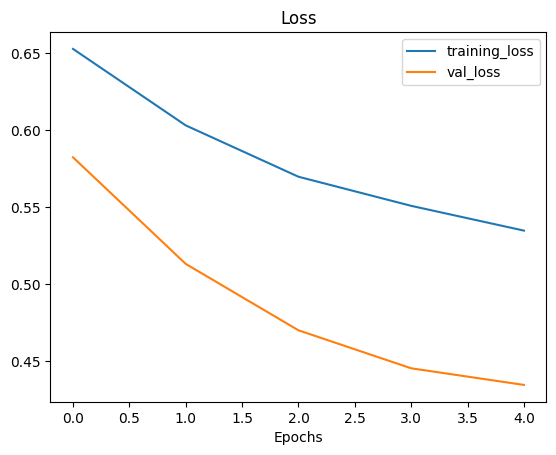

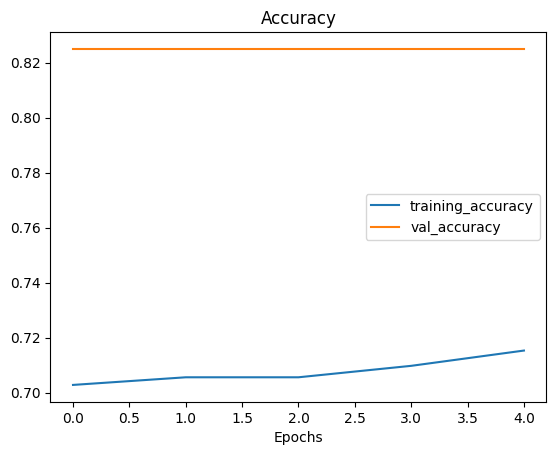

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(valid_statement)
print(model_1_pred_probs.shape, model_1_pred_probs.ndim)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

3/3 [==============================] - 0s 4ms/step
(80, 1) 2


array([[0.7889377 ],
       [0.78725773],
       [0.7835992 ],
       [0.7889303 ],
       [0.74730396],
       [0.7288323 ],
       [0.73739976],
       [0.7697849 ],
       [0.73268896],
       [0.6562394 ]], dtype=float32)

In [ ]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
# In fact now our labes are 1 dim but pred is 2D, so we used sqeeze to reduce dimension >> (762,) and (762, 1)
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)>

In [ ]:
valid_label[:20], valid_label.shape, valid_label.ndim

(array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]), (80,), 1)

In [ ]:
print(f'The equality accuracy rate is: {(np.mean(model_1_preds==valid_label))*100:.2f}%')

The equality accuracy rate is: 82.50%


In [ ]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=valid_label,
                                    y_pred=model_1_preds)
model_1_results

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 82.5,
 'precision': 0.6806249999999999,
 'recall': 0.825,
 'f1': 0.7458904109589041}

In [ ]:
# Check baseline metrics
baseline_results

{'accuracy': 90.0,
 'precision': 0.9108108108108108,
 'recall': 0.9,
 'f1': 0.8828571428571429}

In [ ]:
# Is our simple Keras model better than our baseline model?
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 90.00, New accuracy: 82.50, Difference: -7.50
Baseline precision: 0.91, New precision: 0.68, Difference: -0.23
Baseline recall: 0.90, New recall: 0.82, Difference: -0.08
Baseline f1: 0.88, New f1: 0.75, Difference: -0.14


### Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
print(f'Length of our vocabulary is: {len(words_in_vocab)}')
print(f'10 most repetitive words are: {words_in_vocab[:10]}')
print(f'10 less repetitive words are: {words_in_vocab[-10:]}')

Length of our vocabulary is: 799
10 most repetitive words are: ['', '[UNK]', 'it', 'the', 'i', 'this', 'is', 'a', 'you', 'and']
10 less repetitive words are: ['agree', 'ago', 'afford', 'advise', 'advertisement', 'action', 'according', 'abroad', 'abomination', '5']


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding_1").get_weights()[0]
print(embed_weights.shape) # same size as vocab size and embedding_dim (each word is a embedding_dim size vector)

(10000, 128)


### Embedding Projector

Tensorflow word embedding : https://www.tensorflow.org/text/guide/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk

Tensorflow embedding projector
https://projector.tensorflow.org/


In [ ]:
# We need two files : vocabs and weights
words_in_vocab[:5], embed_weights.shape

(['', '[UNK]', 'it', 'the', 'i'], (10000, 128))

In [ ]:
# Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

In [ ]:
# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Recurrent Neural Networks (RNN's)

### Model 2: LSTM

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
# tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
# x = layers.LSTM(64, return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get another summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [ ]:
# Fit model
model_2_history = model_2.fit(train_statement,
                              train_label,
                              epochs=5,
                              validation_data=(valid_statement, valid_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240116-165030
Epoch 1/5
23/23 [==============================] - 4s 61ms/step - loss: 0.6197 - accuracy: 0.7042 - val_loss: 0.4840 - val_accuracy: 0.8250
Epoch 2/5
23/23 [==============================] - 1s 33ms/step - loss: 0.5614 - accuracy: 0.7125 - val_loss: 0.3823 - val_accuracy: 0.8500
Epoch 3/5
23/23 [==============================] - 1s 39ms/step - loss: 0.3062 - accuracy: 0.8861 - val_loss: 0.2676 - val_accuracy: 0.9000
Epoch 4/5
23/23 [==============================] - 1s 41ms/step - loss: 0.1410 - accuracy: 0.9514 - val_loss: 0.2909 - val_accuracy: 0.9000
Epoch 5/5
23/23 [==============================] - 1s 59ms/step - loss: 0.0680 - accuracy: 0.9819 - val_loss: 0.3563 - val_accuracy: 0.9000


In [ ]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(valid_statement)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

3/3 [==============================] - 1s 6ms/step


((80, 1),
 array([[0.992419  ],
        [0.91995686],
        [0.99006104],
        [0.98862517],
        [0.9729124 ],
        [0.98895043],
        [0.99017805],
        [0.99195313],
        [0.9803461 ],
        [0.974198  ]], dtype=float32))

In [ ]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=valid_label,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 90.0,
 'precision': 0.8955882352941178,
 'recall': 0.9,
 'f1': 0.8969001148105626}

In [ ]:
# Compare model 2 to baseline
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 90.00, New accuracy: 90.00, Difference: 0.00
Baseline precision: 0.91, New precision: 0.90, Difference: -0.02
Baseline recall: 0.90, New recall: 0.90, Difference: 0.00
Baseline f1: 0.88, New f1: 0.90, Difference: 0.01


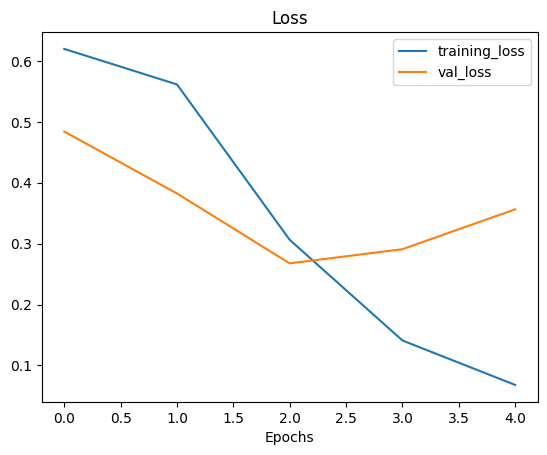

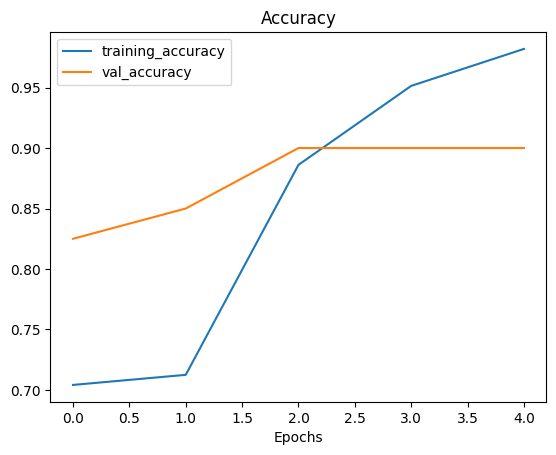

In [ ]:
plot_loss_curves(model_2_history)

### Model 3: GRU

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
# tf.random.set_seed(42)
model_3_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
print(x.shape)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = tf.keras.layers.GRU(64)(x)
print(x.shape)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

(None, 15, 128)
(None, 64)


In [ ]:
# Get a summary of the model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [ ]:
# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

Notice the difference in number of trainable parameters between `model_2 (LSTM)` and `model_3 (GRU)`. The difference comes from the LSTM cell having more trainable parameters than the GRU cell.

We'll fit our model just as we've been doing previously. We'll also track our models results using our `create_tensorboard_callback()` function.

In [ ]:
# Fit model
model_3_history = model_3.fit(train_statement,
                              train_label,
                              epochs=5,
                              validation_data=(valid_statement, valid_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240116-165152
Epoch 1/5
23/23 [==============================] - 4s 58ms/step - loss: 0.6289 - accuracy: 0.7083 - val_loss: 0.4711 - val_accuracy: 0.8250
Epoch 2/5
23/23 [==============================] - 1s 36ms/step - loss: 0.5987 - accuracy: 0.7056 - val_loss: 0.4947 - val_accuracy: 0.8250
Epoch 3/5
23/23 [==============================] - 1s 35ms/step - loss: 0.5828 - accuracy: 0.7083 - val_loss: 0.4455 - val_accuracy: 0.8375
Epoch 4/5
23/23 [==============================] - 1s 34ms/step - loss: 0.4071 - accuracy: 0.7931 - val_loss: 0.3643 - val_accuracy: 0.8625
Epoch 5/5
23/23 [==============================] - 1s 34ms/step - loss: 0.1563 - accuracy: 0.9389 - val_loss: 0.3182 - val_accuracy: 0.8750


In [ ]:
# Evaluate GRU model
model_3.evaluate(valid_statement, valid_label)

3/3 [==============================] - 0s 7ms/step - loss: 0.3182 - accuracy: 0.8750


[0.3181513249874115, 0.875]

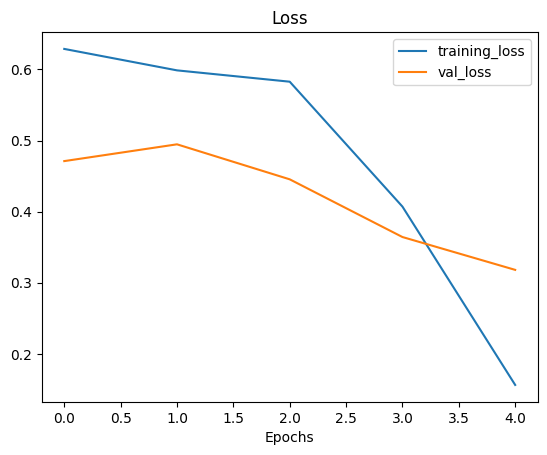

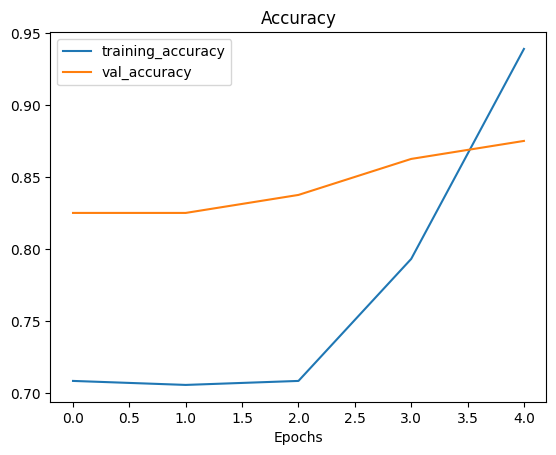

In [ ]:
plot_loss_curves(model_3_history)

In [ ]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(valid_statement)
model_3_pred_probs.shape, model_3_pred_probs[:10]

3/3 [==============================] - 1s 8ms/step


((80, 1),
 array([[0.9955376 ],
        [0.8279711 ],
        [0.9894269 ],
        [0.9739715 ],
        [0.9454837 ],
        [0.90081584],
        [0.9841313 ],
        [0.9949423 ],
        [0.86271155],
        [0.78598195]], dtype=float32))

In [ ]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=valid_label,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 87.5,
 'precision': 0.8688725490196078,
 'recall': 0.875,
 'f1': 0.8711251435132032}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 90.00, New accuracy: 87.50, Difference: -2.50
Baseline precision: 0.91, New precision: 0.87, Difference: -0.04
Baseline recall: 0.90, New recall: 0.88, Difference: -0.03
Baseline f1: 0.88, New f1: 0.87, Difference: -0.01


### Bidirectonal RNN model

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
# tf.random.set_seed(42)
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

🔑 Note: You can use the Bidirectional wrapper on any RNN cell in TensorFlow. For example, `layers.Bidirectional(layers.GRU(64))` creates a bidirectional GRU cell.

Our bidirectional model is built, let's compile it.

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_statement,
                              train_label,
                              epochs=5,
                              validation_data=(valid_statement, valid_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20240116-165305
Epoch 1/5
23/23 [==============================] - 8s 100ms/step - loss: 0.6158 - accuracy: 0.7056 - val_loss: 0.4729 - val_accuracy: 0.8250
Epoch 2/5
23/23 [==============================] - 1s 47ms/step - loss: 0.5466 - accuracy: 0.7111 - val_loss: 0.3818 - val_accuracy: 0.8250
Epoch 3/5
23/23 [==============================] - 1s 49ms/step - loss: 0.3572 - accuracy: 0.8444 - val_loss: 0.3570 - val_accuracy: 0.8875
Epoch 4/5
23/23 [==============================] - 1s 45ms/step - loss: 0.1458 - accuracy: 0.9514 - val_loss: 0.2946 - val_accuracy: 0.8750
Epoch 5/5
23/23 [==============================] - 1s 66ms/step - loss: 0.0723 - accuracy: 0.9819 - val_loss: 0.3273 - val_accuracy: 0.8875


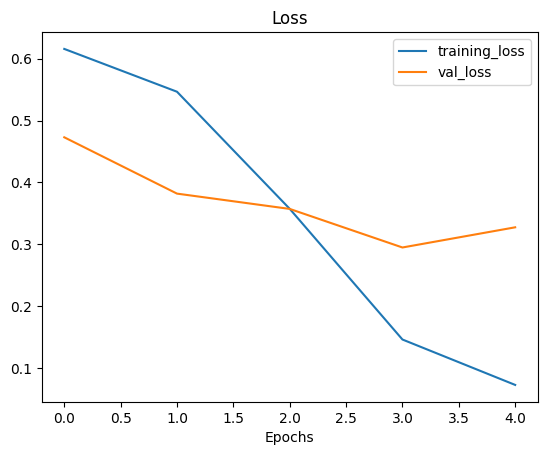

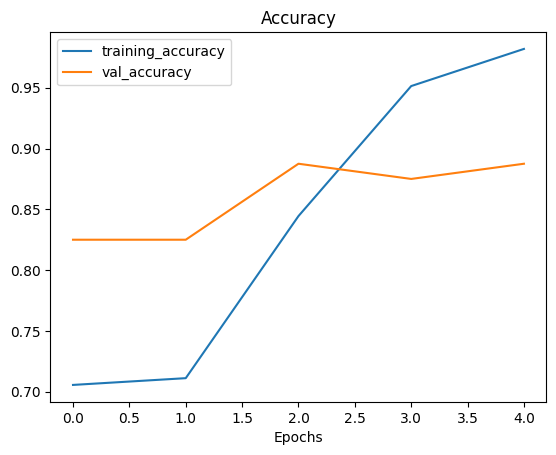

In [ ]:
plot_loss_curves(model_4_history)

In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(valid_statement)
model_4_pred_probs[:10]

3/3 [==============================] - 1s 7ms/step


array([[0.9961489 ],
       [0.934332  ],
       [0.9893056 ],
       [0.97157776],
       [0.96855044],
       [0.9892703 ],
       [0.98595464],
       [0.9906212 ],
       [0.98137766],
       [0.9796401 ]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(valid_label, model_4_preds)
model_4_results

{'accuracy': 88.75,
 'precision': 0.8805335968379447,
 'recall': 0.8875,
 'f1': 0.882}

#### Compare `LSTM model` with `Bidirectional LSTM model`

In [ ]:
model_2_results

{'accuracy': 90.0,
 'precision': 0.8955882352941178,
 'recall': 0.9,
 'f1': 0.8969001148105626}

In [ ]:
model_4_results

{'accuracy': 88.75,
 'precision': 0.8805335968379447,
 'recall': 0.8875,
 'f1': 0.882}

In [ ]:
# Check to see how the bidirectional model performs against the baseline
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 90.00, New accuracy: 88.75, Difference: -1.25
Baseline precision: 0.91, New precision: 0.88, Difference: -0.03
Baseline recall: 0.90, New recall: 0.89, Difference: -0.01
Baseline f1: 0.88, New f1: 0.88, Difference: -0.00


### Convolutional Neural Networks for Text

### Model 5: Conv1D
Before we build a full 1-dimensional CNN model, let's see a 1-dimensional convolutional layer (also called a `temporal convolution`) in action.

We'll first create an embedding of a sample of text and experiment passing it through a `Conv1D()` layer and `GlobalMaxPool1D()` layer.

In [ ]:
# Test out the embedding, 1D convolutional and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d = layers.Conv1D(filters=32, kernel_size=5, activation="relu") # convolve over target sequence 5 words at a time
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output) # get the most important features
embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

Notice the output shapes of each layer.

The embedding has an output shape dimension of the parameters we set it to `(input_length=15 and output_dim=128)`.

The 1-dimensional convolutional layer has an output which has been compressed inline with its parameters. And the same goes for the max pooling layer output.

Our text starts out as a string but gets converted to a feature vector of length 64 through various transformation steps (from tokenization to embedding to 1-dimensional convolution to max pool).

Let's take a peak at what each of these transformations looks like.

In [ ]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[-0.02155903, -0.0046259 , -0.05816417, ...,  0.02025975,
          -0.00172133,  0.00507837],
         [ 0.0007208 , -0.01601607,  0.07485328, ..., -0.01098535,
           0.07256506, -0.03781354],
         [-0.05152071, -0.02489033, -0.02006437, ...,  0.02158338,
          -0.01026219,  0.04844396],
         ...,
         [ 0.05600978,  0.02038715,  0.06892361, ..., -0.09494141,
           0.0665134 , -0.0325104 ],
         [ 0.05600978,  0.02038715,  0.06892361, ..., -0.09494141,
           0.0665134 , -0.0325104 ],
         [ 0.05600978,  0.02038715,  0.06892361, ..., -0.09494141,
           0.0665134 , -0.0325104 ]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[0.00494066, 0.01848509, 0.        , 0.        , 0.        ,
          0.        , 0.03207759, 0.        , 0.        , 0.02441538,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.

Alright, we've seen the outputs of several components of a CNN for sequences, let's put them together and construct a full model, compile it (just as we've done with our other models) and get a summary.

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
# tf.random.set_seed(42)
model_5_embedding = tf.keras.layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
inputs = tf.keras.layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our 1D convolution model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [ ]:
# Fit the model
model_5_history = model_5.fit(train_statement,
                              train_label,
                              epochs=5,
                              validation_data=(valid_statement, valid_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240116-165501
Epoch 1/5
23/23 [==============================] - 2s 33ms/step - loss: 0.6295 - accuracy: 0.7000 - val_loss: 0.4778 - val_accuracy: 0.8250
Epoch 2/5
23/23 [==============================] - 1s 23ms/step - loss: 0.5627 - accuracy: 0.7056 - val_loss: 0.4613 - val_accuracy: 0.8375
Epoch 3/5
23/23 [==============================] - 0s 20ms/step - loss: 0.4979 - accuracy: 0.7264 - val_loss: 0.4049 - val_accuracy: 0.8500
Epoch 4/5
23/23 [==============================] - 1s 22ms/step - loss: 0.3851 - accuracy: 0.8361 - val_loss: 0.3261 - val_accuracy: 0.8750
Epoch 5/5
23/23 [==============================] - 0s 20ms/step - loss: 0.2522 - accuracy: 0.9194 - val_loss: 0.2648 - val_accuracy: 0.8750


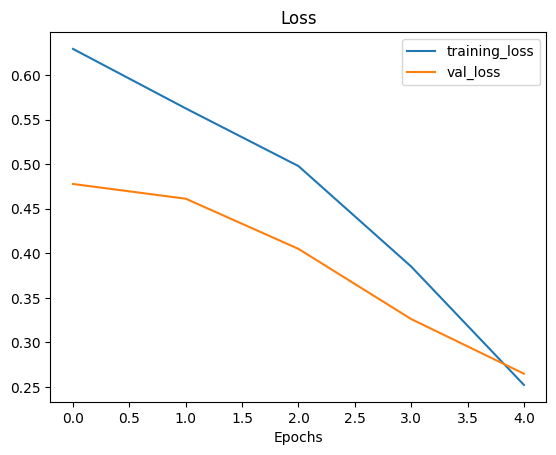

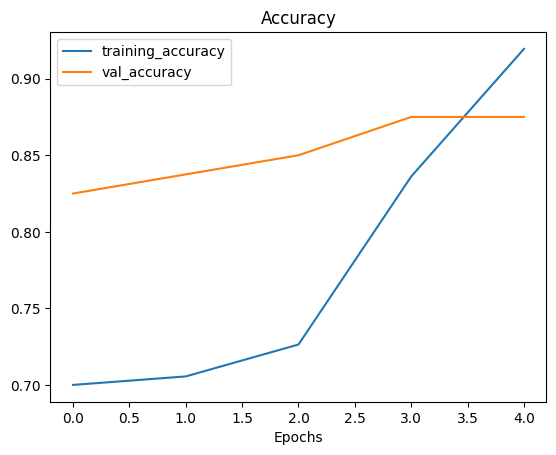

In [ ]:
plot_loss_curves(model_5_history)

In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(valid_statement)
model_5_pred_probs[:10]

3/3 [==============================] - 0s 4ms/step


array([[0.95099616],
       [0.66833085],
       [0.9036281 ],
       [0.8151088 ],
       [0.8094763 ],
       [0.97272897],
       [0.7560207 ],
       [0.8834077 ],
       [0.7854142 ],
       [0.7170986 ]], dtype=float32)

In [ ]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculate model_5 evaluation metrics
model_5_results = calculate_results(y_true=valid_label,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 87.5,
 'precision': 0.865,
 'recall': 0.875,
 'f1': 0.866421568627451}

In [ ]:
# Compare model_5 results to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 90.00, New accuracy: 87.50, Difference: -2.50
Baseline precision: 0.91, New precision: 0.86, Difference: -0.05
Baseline recall: 0.90, New recall: 0.88, Difference: -0.03
Baseline f1: 0.88, New f1: 0.87, Difference: -0.02


### Using Pretrained Embeddings (transfer learning for NLP) My favorite :)

### Model 6: TensorFlow Hub Pretrained Sentence Encoder
https://tfhub.dev/google/universal-sentence-encoder/4

In [ ]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01239911  0.00531641  0.00797472 -0.03804583  0.01240789 -0.00810601
  0.0091806   0.00438819 -0.08793548  0.03114571 -0.02497367 -0.04665659
  0.00771848 -0.00802412 -0.08866692  0.0074163   0.03054637 -0.03240824
  0.07602613 -0.02934266 -0.04387604  0.02580049 -0.04796465  0.03009111
 -0.01229549 -0.05937985 -0.03759459  0.05144268 -0.00768851  0.02472853
 -0.02116947  0.05947938 -0.07611944  0.0674796   0.01076261  0.06530146
 -0.07631268 -0.08424358  0.02060567 -0.00485047 -0.05268645  0.00759981
  0.06253339  0.00515983 -0.06616408 -0.02195467  0.02018192  0.02591529
  0.05857546 -0.0091106 ], shape=(50,), dtype=float32)


In [ ]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [ ]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [ ]:
# Create model using the Sequential API
from tensorflow.keras import layers

model_6 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_statement,
                              train_label,
                              epochs=5,
                              validation_data=(valid_statement, valid_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240116-165939
Epoch 1/5
23/23 [==============================] - 4s 54ms/step - loss: 0.6261 - accuracy: 0.7278 - val_loss: 0.5132 - val_accuracy: 0.8250
Epoch 2/5
23/23 [==============================] - 0s 19ms/step - loss: 0.4896 - accuracy: 0.7458 - val_loss: 0.3791 - val_accuracy: 0.8375
Epoch 3/5
23/23 [==============================] - 0s 20ms/step - loss: 0.3782 - accuracy: 0.8639 - val_loss: 0.3016 - val_accuracy: 0.9250
Epoch 4/5
23/23 [==============================] - 0s 16ms/step - loss: 0.2922 - accuracy: 0.9139 - val_loss: 0.2476 - val_accuracy: 0.9500
Epoch 5/5
23/23 [==============================] - 0s 13ms/step - loss: 0.2322 - accuracy: 0.9375 - val_loss: 0.2063 - val_accuracy: 0.9500


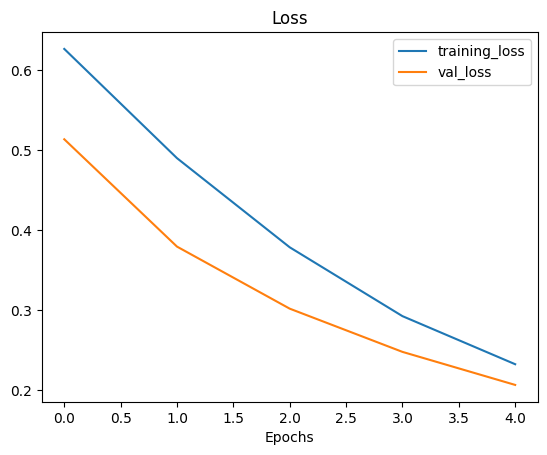

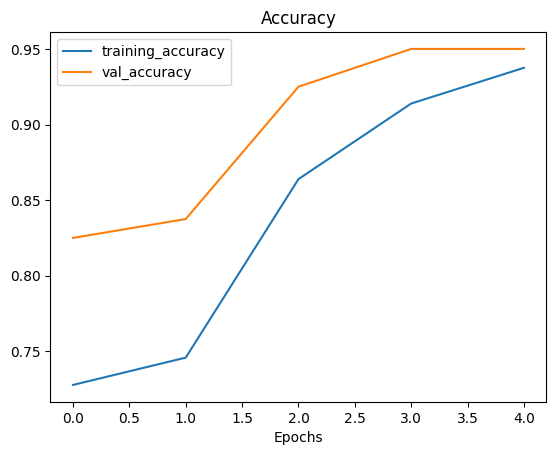

In [ ]:
plot_loss_curves(model_6_history)

In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(valid_statement)
model_6_pred_probs[:10]

3/3 [==============================] - 1s 16ms/step


array([[0.98847884],
       [0.18719278],
       [0.93668914],
       [0.9302773 ],
       [0.81677973],
       [0.8431537 ],
       [0.8259775 ],
       [0.9884451 ],
       [0.91962194],
       [0.35627127]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(valid_label, model_6_preds)
model_6_results

{'accuracy': 95.0, 'precision': 0.95, 'recall': 0.95, 'f1': 0.95}

In [ ]:
# Compare TF Hub model to baseline
compare_baseline_to_new_results(baseline_results, model_6_results)

Baseline accuracy: 90.00, New accuracy: 95.00, Difference: 5.00
Baseline precision: 0.91, New precision: 0.95, Difference: 0.04
Baseline recall: 0.90, New recall: 0.95, Difference: 0.05
Baseline f1: 0.88, New f1: 0.95, Difference: 0.07


### Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data
One of the benefits of using transfer learning methods, such as, the pretrained embeddings within the USE is the ability to get great results on a small amount of data (the USE paper even mentions this in the abstract).

To put this to the test, we're going to make a small subset of the training data (10%), train a model and evaluate it.

In [ ]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_statement),
                                                                                                                            train_label,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [ ]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_statement)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 720
Length of 10% training examples: 72


In [ ]:
# Check the number of targets in our subset of data
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_percent).value_counts()

1    51
0    21
dtype: int64

In [ ]:
pd.Series(train_label).value_counts()

1    508
0    212
dtype: int64

To make sure we're making an appropriate comparison between our model's ability to learn from the full training set and 10% subset, we'll clone our USE model (model_6) using the `tf.keras.models.clone_model()` method.

Doing this will create the same architecture but reset the learned weights of the clone target (pretrained weights from the USE will remain but all others will be reset).

In [ ]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


Notice the layout of `model_7` is the same as `model_6`. Now let's train the newly created model on our `10% training data` subset.


In [ ]:
# Fit the model to 10% of the training data, but all validation data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(valid_statement, valid_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240116-170113
Epoch 1/5
3/3 [==============================] - 4s 305ms/step - loss: 0.6913 - accuracy: 0.5556 - val_loss: 0.6558 - val_accuracy: 0.8375
Epoch 2/5
3/3 [==============================] - 0s 33ms/step - loss: 0.6585 - accuracy: 0.7361 - val_loss: 0.6297 - val_accuracy: 0.8375
Epoch 3/5
3/3 [==============================] - 0s 53ms/step - loss: 0.6322 - accuracy: 0.7361 - val_loss: 0.6046 - val_accuracy: 0.8375
Epoch 4/5
3/3 [==============================] - 0s 35ms/step - loss: 0.6073 - accuracy: 0.7361 - val_loss: 0.5799 - val_accuracy: 0.8375
Epoch 5/5
3/3 [==============================] - 0s 33ms/step - loss: 0.5829 - accuracy: 0.7500 - val_loss: 0.5552 - val_accuracy: 0.8375


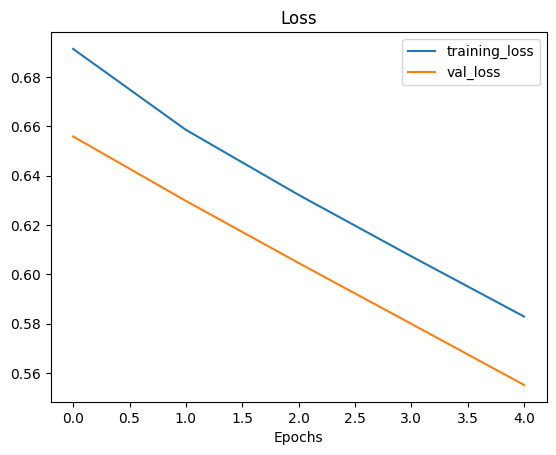

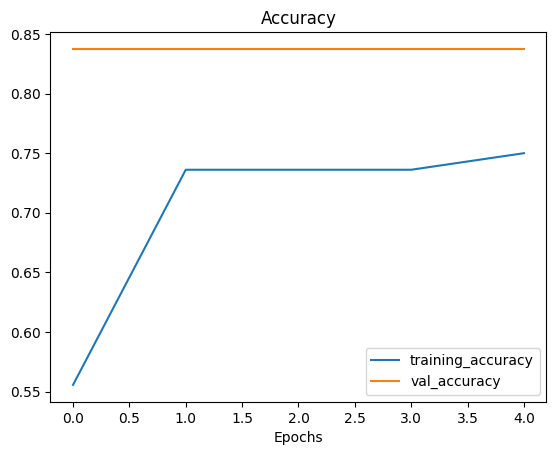

In [ ]:
plot_loss_curves(model_7_history)

In [ ]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(valid_statement)
model_7_pred_probs[:10]

3/3 [==============================] - 0s 9ms/step


array([[0.6486819 ],
       [0.5500543 ],
       [0.6328616 ],
       [0.6051938 ],
       [0.5595395 ],
       [0.5771175 ],
       [0.5807889 ],
       [0.6539909 ],
       [0.61899865],
       [0.483983  ]], dtype=float32)

In [ ]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model results
model_7_results = calculate_results(valid_label, model_7_preds)
model_7_results

{'accuracy': 83.75,
 'precision': 0.864240506329114,
 'recall': 0.8375,
 'f1': 0.774367816091954}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_7_results)

Baseline accuracy: 90.00, New accuracy: 83.75, Difference: -6.25
Baseline precision: 0.91, New precision: 0.86, Difference: -0.05
Baseline recall: 0.90, New recall: 0.84, Difference: -0.06
Baseline f1: 0.88, New f1: 0.77, Difference: -0.11


### Comparing the performance of each of our models

In [ ]:
type(baseline_results)

dict

In [ ]:
# Combine model results(dictionaries) into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,90.00,0.910811,0.9000,0.882857
simple_dense,82.50,0.680625,0.8250,0.745890
lstm,90.00,0.895588,0.9000,0.896900
gru,87.50,0.868873,0.8750,0.871125
bidirectional,88.75,0.880534,0.8875,0.882000
conv1d,87.50,0.865000,0.8750,0.866422
tf_hub_sentence_encoder,95.00,0.950000,0.9500,0.950000
tf_hub_10_percent_data,83.75,0.864241,0.8375,0.774368


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

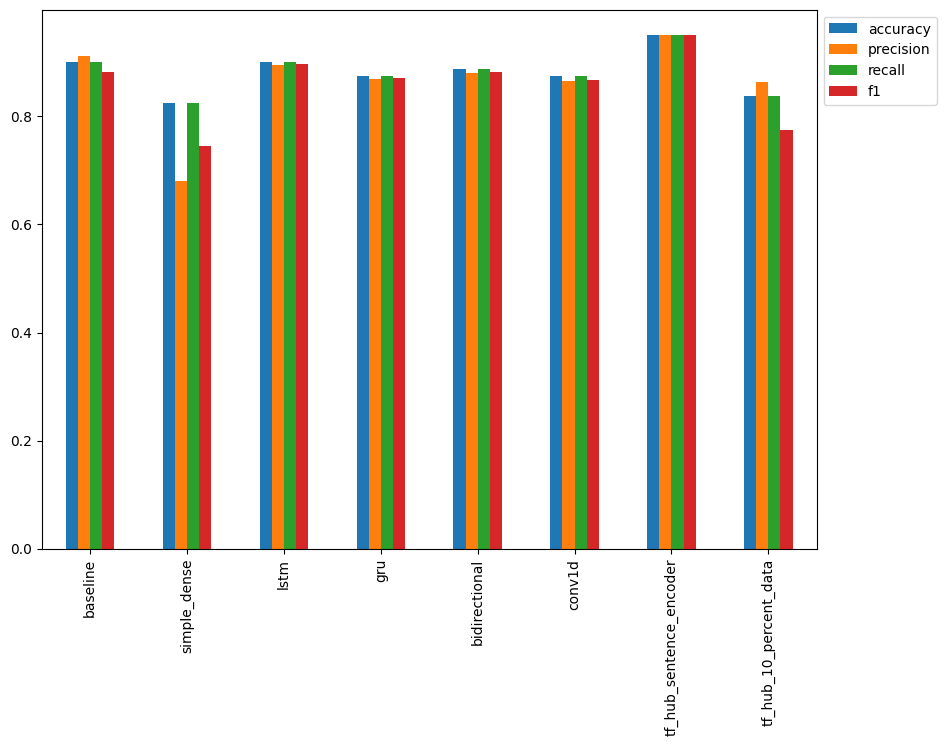

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

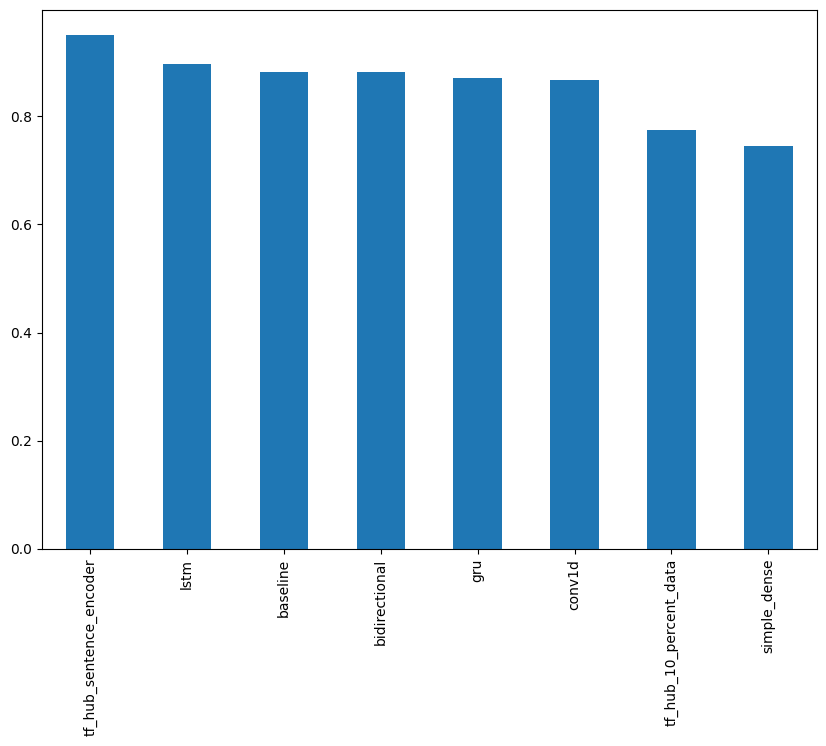

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [ ]:
Writer = tf.summary.create_file_writer('/content/model_logs')

In [ ]:
Writer

In [ ]:
# !tensorboard --logdir ./model_logs \

In [ ]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./model_logs \
  --name "NLP modelling experiments" \
  --description "A series of different NLP modellings experiments with various models" \
  --one_shot # exits the uploader when upload has finished

2024-01-16 17:08:04.248921: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-01-16 17:08:07.539869: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-01-16 17:08:07.539916: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https:/

In [ ]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

In [ ]:
# Get mean pred probs for 3 models
baseline_pred_probs = np.max(model_0.predict_proba(valid_statement), axis=1) # get the prediction probabilities from baseline model
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs, axis=1) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3) # average and round the prediction probabilities to get prediction classes
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1.], dtype=float32)>

Wonderful! We've got a combined predictions array of different classes, let's evaluate them against the true labels and add our stacked model's results to our all_model_results DataFrame.

In [ ]:
# Calculate results from averaging the prediction probabilities
ensemble_results = calculate_results(valid_label, combined_preds)
ensemble_results

{'accuracy': 91.25,
 'precision': 0.908399209486166,
 'recall': 0.9125,
 'f1': 0.9082222222222223}

In [ ]:
# Add our combined model's results to the results DataFrame
all_model_results.loc["ensemble_results"] = ensemble_results

In [ ]:
# Convert the accuracy to the same scale as the rest of the results
all_model_results.loc["ensemble_results"]["accuracy"] = all_model_results.loc["ensemble_results"]["accuracy"]/100

In [ ]:
all_model_results

,accuracy,precision,recall,f1
baseline,0.9000,0.910811,0.9000,0.882857
simple_dense,0.8250,0.680625,0.8250,0.745890
lstm,0.9000,0.895588,0.9000,0.896900
gru,0.8750,0.868873,0.8750,0.871125
bidirectional,0.8875,0.880534,0.8875,0.882000
conv1d,0.8750,0.865000,0.8750,0.866422
tf_hub_sentence_encoder,0.9500,0.950000,0.9500,0.950000
tf_hub_10_percent_data,0.8375,0.864241,0.8375,0.774368
ensemble_results,0.9125,0.908399,0.9125,0.908222


### Saving and loading a trained model

In [ ]:
model_6_results

{'accuracy': 95.0, 'precision': 0.95, 'recall': 0.95, 'f1': 0.95}

In [ ]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

If you save a model as a `HDF5`, when loading it back in, you need to let TensorFlow know about any custom objects you've used (e.g. components which aren't built from pure TensorFlow, such as TensorFlow Hub components).
https://www.tensorflow.org/tutorials/keras/save_and_load#saving_custom_objects

In [ ]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
# How does our loaded model perform?
loaded_model_6.evaluate(valid_statement, valid_label)

3/3 [==============================] - 1s 12ms/step - loss: 0.2063 - accuracy: 0.9500


[0.20631222426891327, 0.949999988079071]

In [ ]:
model_6_results

{'accuracy': 95.0, 'precision': 0.95, 'recall': 0.95, 'f1': 0.95}

Calling the `save()` method on our target model and passing it a filepath allows us to save our model in the `SavedModel` format.

In [ ]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [ ]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(valid_statement, valid_label)

3/3 [==============================] - 1s 11ms/step - loss: 0.2063 - accuracy: 0.9500


[0.20631222426891327, 0.949999988079071]

Tensorflow documentation for save model
https://www.tensorflow.org/tutorials/keras/save_and_load

### Finding the most wrong examples from our outputs

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": valid_statement,
                       "target": valid_label,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)}) # Without tf.round
val_df.head()

,text,target,pred,pred_prob
0,Awesome as always.,1,1.0,0.988479
1,Nah.,0,0.0,0.187193
2,So easy and good.,1,1.0,0.936689
3,Exactly!,1,1.0,0.930277
4,I just got hungry.,1,1.0,0.816780


Oh yeah! Now let's find our model's wrong predictions `(where target != pred)` and `sort` them by their prediction probability (the `pred_prob column`).

In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
36,Why don't you use a plate and a spoon or a fork?,0,1.0,0.575716
42,Oil oli and oil.,0,1.0,0.548813
71,It tastes like heaven.,1,0.0,0.457905
67,Why does this look so mouth-watering?,1,0.0,0.379679


In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.5757157802581787
Text:
Why don't you use a plate and a spoon or a fork?

----

Target: 0, Pred: 1, Prob: 0.5488128662109375
Text:
Oil oli and oil.

----

Target: 1, Pred: 0, Prob: 0.45790544152259827
Text:
It tastes like heaven.

----

Target: 1, Pred: 0, Prob: 0.3796786069869995
Text:
Why does this look so mouth-watering?

----



We can view the bottom end of our most_wrong DataFrame to inspect false negatives (model predicts 0, Negative comment, when it should've predicted 1, positive comment).

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 0.5757157802581787
Text:
Why don't you use a plate and a spoon or a fork?

----

Target: 0, Pred: 1, Prob: 0.5488128662109375
Text:
Oil oli and oil.

----

Target: 1, Pred: 0, Prob: 0.45790544152259827
Text:
It tastes like heaven.

----

Target: 1, Pred: 0, Prob: 0.3796786069869995
Text:
Why does this look so mouth-watering?

----



### Making predictions on the test dataset
Alright we've seen how our model's perform on the validation set.

But how about the test dataset?

We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

Let's write some code to make predictions on random samples from the test dataset and visualize them.

In [ ]:
# Making predictions on the test dataset
test_sentences = test_df["Comments"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"comment:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 207ms/step
Pred: 1, Prob: 0.5303487181663513
comment:
This one's just not for me. Different tastes, I guess!

----

1/1 [==============================] - 0s 126ms/step
Pred: 1, Prob: 0.7671579122543335
comment:
Pasta makes any day better.

----

1/1 [==============================] - 0s 96ms/step
Pred: 0, Prob: 0.4075367748737335
comment:
The aroma coming from my screen is enticing!

----

1/1 [==============================] - 0s 83ms/step
Pred: 1, Prob: 0.8133313059806824
comment:
I'm blown away by the presentation and flavors!

----

1/1 [==============================] - 0s 112ms/step
Pred: 1, Prob: 0.834674596786499
comment:
Salad goals right here!

----

1/1 [==============================] - 0s 155ms/step
Pred: 1, Prob: 0.6607906818389893
comment:
I'm not a fan of this combination.

----

1/1 [==============================] - 0s 132ms/step
Pred: 1, Prob: 0.8742206692695618
comment:
The flavors in this are so harmonious. Perfect balance

### Predicting on Instagram comments from a custom comment


In [ ]:
# Turn Tweet into string
pejman_comment = "It is my favorite iranian dish."

In [ ]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(positive comment)" if pred_label > 0 else "(negative comment)", f"Prob: {pred_prob[0][0]}")
  print(f"comment:\n{sentence}")

In [ ]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=pejman_comment)

1/1 [==============================] - 0s 56ms/step
Pred: 1.0 (positive comment) Prob: 0.8379640579223633
comment:
It is my favorite iranian dish.
